## Customer Service Requests Analysis

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [115]:
%matplotlib inline

In [116]:
df = pd.read_csv("C:\\Users\\Ezra\\Documents\\Python Practice\\Data Science with Python Two\\311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [117]:
# Identify the shape of the dataset

df.shape

(300698, 53)

In [6]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [7]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
# Identify the variables with null values

df.count()

Unique Key                        300698
Created Date                      300698
Closed Date                       298534
Agency                            300698
Agency Name                       300698
Complaint Type                    300698
Descriptor                        294784
Location Type                     300567
Incident Zip                      298083
Incident Address                  256288
Street Name                       256288
Cross Street 1                    251419
Cross Street 2                    250919
Intersection Street 1              43858
Intersection Street 2              43362
Address Type                      297883
City                              298084
Landmark                             349
Facility Type                     298527
Status                            300698
Due Date                          300695
Resolution Description            300698
Resolution Action Updated Date    298511
Community Board                   300698
Borough         

In [200]:
# Utilize missing value treatment: dropped irrelevant columns and ones containing mostly or all NaN

df2 = df.drop(['Landmark','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found','School Name','School Number','School Region','Park Facility Name'],axis=1)

In [201]:
df2.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [219]:
# Analyze the date column and remove the entries if it has an incorrect timeline

df2 = df2.dropna(subset = ['Created Date','Closed Date'])

In [220]:
df2.shape

(298534, 30)

In [292]:
# Change 'Created Date' and 'Closed Date' to datetime

df2['Created Date'] = pd.to_datetime(df2['Created Date'], errors='coerce')
df2['Closed Date'] = pd.to_datetime(df2['Closed Date'], errors='coerce')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      298534 non-null  int64         
 1   Created Date                    298534 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          298534 non-null  object        
 4   Agency Name                     298534 non-null  object        
 5   Complaint Type                  298534 non-null  object        
 6   Descriptor                      292625 non-null  object        
 7   Location Type                   298406 non-null  object        
 8   Incident Zip                    298027 non-null  float64       
 9   Incident Address                254137 non-null  object        
 10  Street Name                     254137 non-null  object 

In [293]:
# Draw a frequency plot for city-wise complaints

df2['City'].value_counts()

BROOKLYN               98295
NEW YORK               65972
BRONX                  40697
STATEN ISLAND          12338
JAMAICA                 7294
ASTORIA                 7046
FLUSHING                5970
RIDGEWOOD               5162
CORONA                  4295
WOODSIDE                3664
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2747
ELMHURST                2673
LONG ISLAND CITY        2570
WOODHAVEN               2463
MASPETH                 2461
SOUTH OZONE PARK        2173
RICHMOND HILL           1902
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
FOREST HILLS            1688
JACKSON HEIGHTS         1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             932
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [294]:
# Merge redundant city names

df2.loc[df2['City'] == 'Astoria', 'City'] = 'ASTORIA'
df2.loc[df2['City'] == 'Long Island City', 'City'] = 'LONG ISLAND CITY'
df2.loc[df2['City'] == 'Woodside', 'City'] = 'WOODSIDE'
df2.loc[df2['City'] == 'East Elmhurst', 'City'] = 'EAST ELMHURST'
df2.loc[df2['City'] == 'Howard Beach', 'City'] = 'HOWARD BEACH'

df2['City'].value_counts()

BROOKLYN               98295
NEW YORK               65972
BRONX                  40697
STATEN ISLAND          12338
JAMAICA                 7294
ASTORIA                 7046
FLUSHING                5970
RIDGEWOOD               5162
CORONA                  4295
WOODSIDE                3664
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2747
ELMHURST                2673
LONG ISLAND CITY        2570
WOODHAVEN               2463
MASPETH                 2461
SOUTH OZONE PARK        2173
RICHMOND HILL           1902
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
FOREST HILLS            1688
JACKSON HEIGHTS         1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             932
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

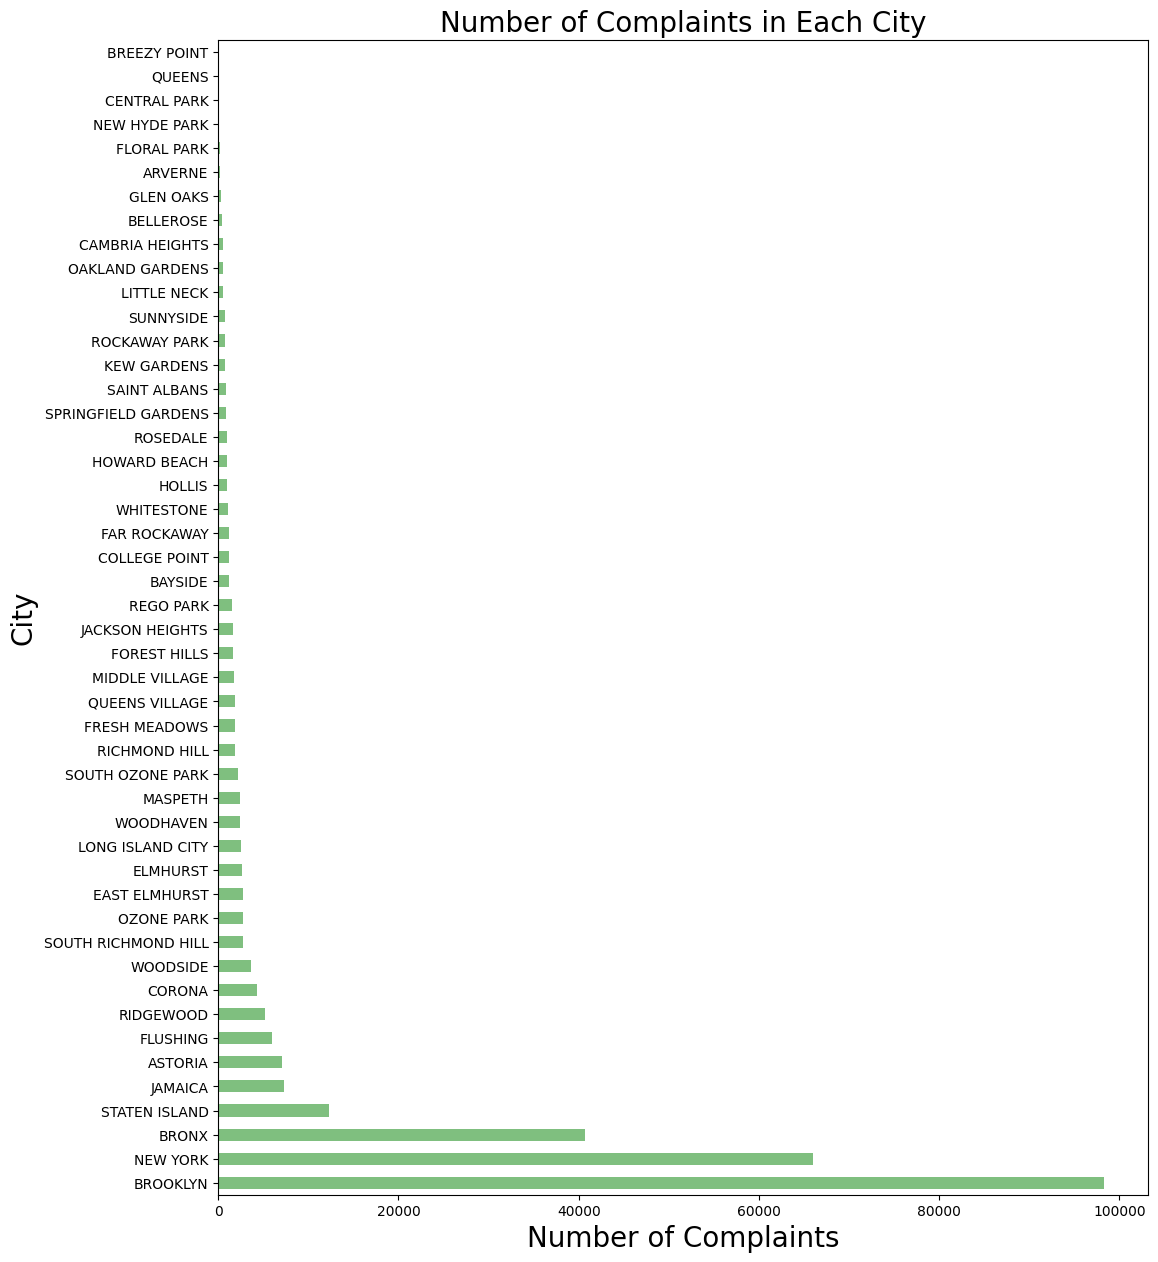

In [295]:
# Draw a frequency plot for city-wise complaints

fig,ax = plt.subplots(figsize=(12,15))
df2['City'].value_counts().plot(kind='barh', alpha=.5, color='g')
plt.title('Number of Complaints in Each City', fontsize=20)
plt.xlabel('Number of Complaints', fontsize=20)
plt.ylabel('City', fontsize=20)
plt.show()

In [296]:
# Draw scatter and hexbin plots for complaint concentration across Brooklyn

df_brooklyn = df2[df2['City'] == 'BROOKLYN']

Text(0, 0.5, 'Latitude')

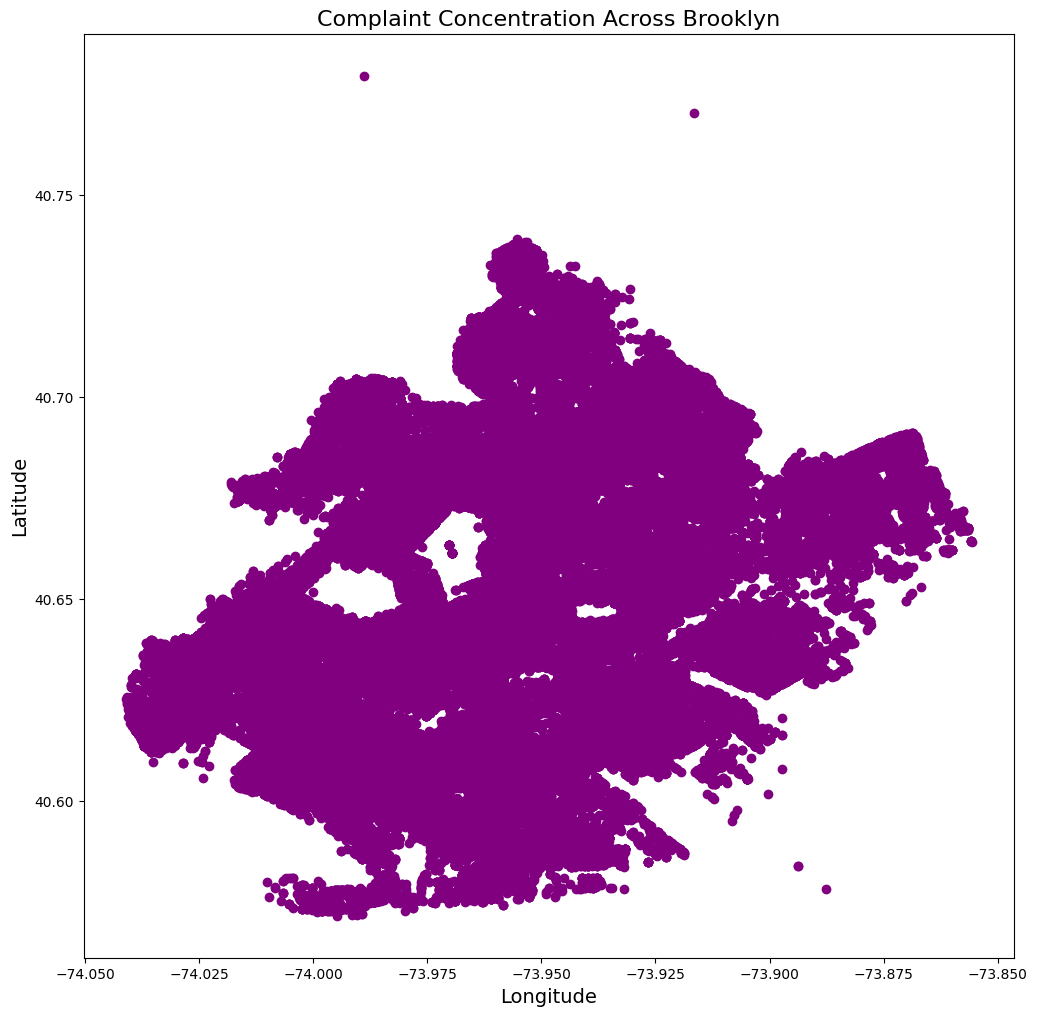

In [297]:
# Scatter plot

fig,ax = plt.subplots(figsize = (12,12))
x= df_brooklyn['Longitude']
y= df_brooklyn['Latitude']
plt.scatter(x, y, color="purple")
plt.title("Complaint Concentration Across Brooklyn", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

Text(0, 0.5, 'Latitude')

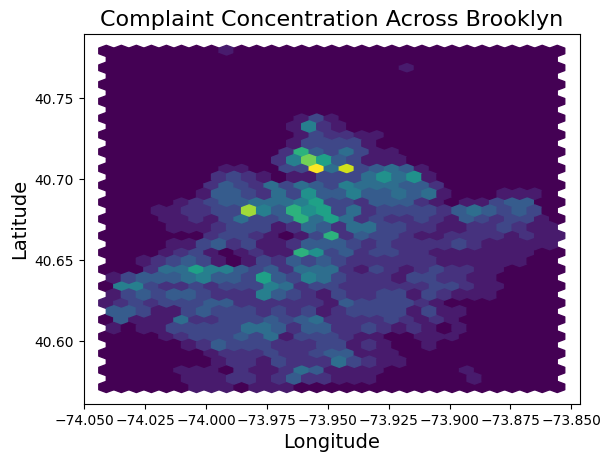

In [298]:
# Hexbin plot

x= df_brooklyn['Longitude']
y= df_brooklyn['Latitude']
plt.hexbin(x, y, gridsize=(30,20), bins=15)
plt.title("Complaint Concentration Across Brooklyn", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

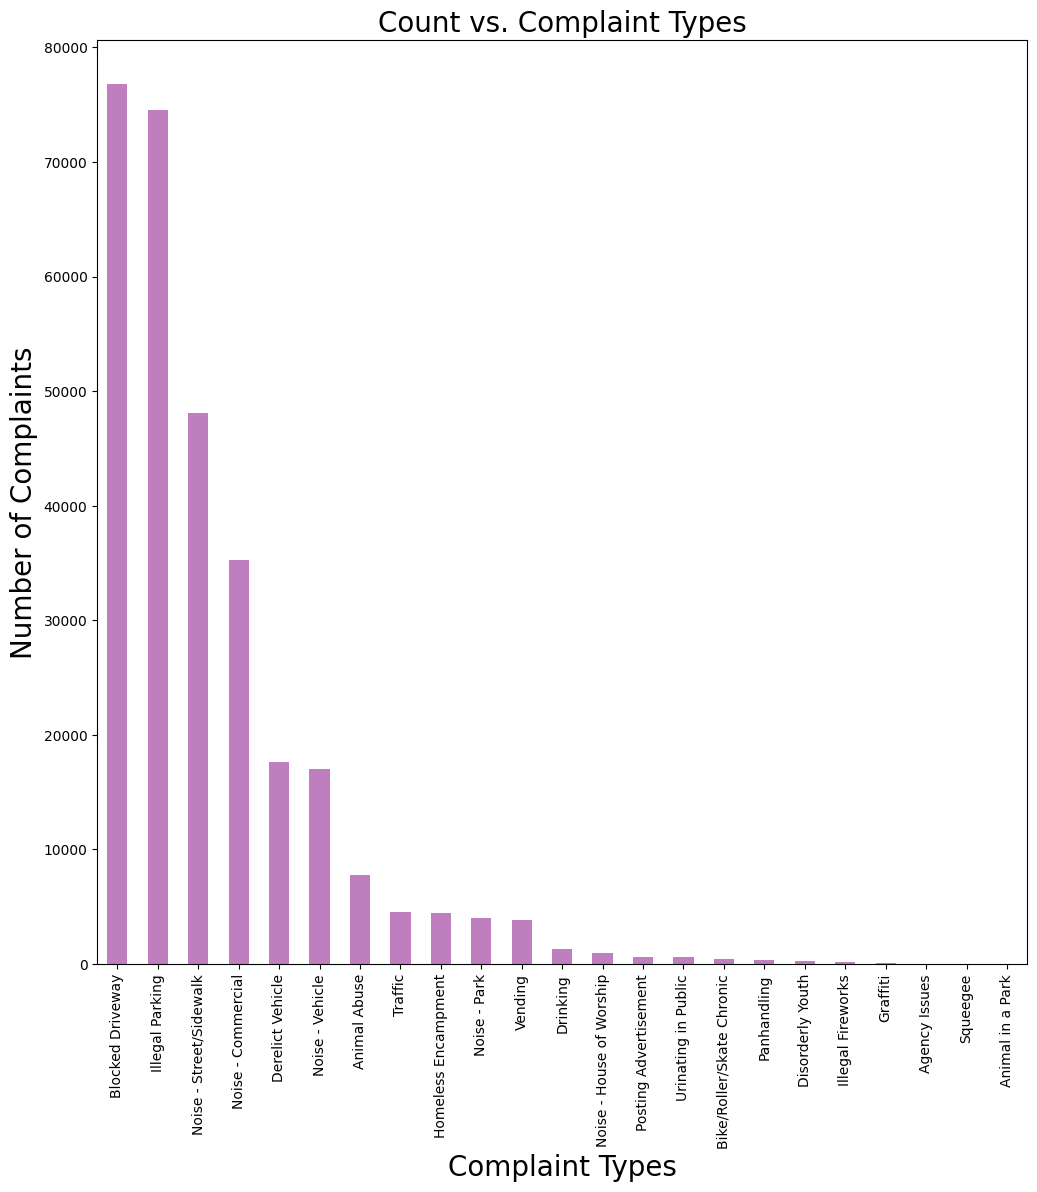

In [396]:
# Plot a bar graph of count vs. complaint types

fig,ax = plt.subplots(figsize=(12,12))
df2['Complaint Type'].value_counts().plot(kind='bar', alpha=.5, color='purple')
plt.title('Count vs. Complaint Types', fontsize=20)
plt.xlabel('Complaint Types', fontsize=20)
plt.ylabel('Number of Complaints', fontsize=20)
plt.show()

## The top 10 types of complaints are: 
1. Blocked Driveway 
2. Illegal Parking
3. Noise - Street/Sidewalk
4. Noise - Commercial
5. Derelict Vehicle
6. Noise - Vehicle
7. Animal Abuse
8. Traffic
9. Homeless Encampment
10. Noise - Park

In [300]:
# Display types of complaints in each city in a separate dataset
# Visualize the major type of complaints in each city (Top 3)

df2['City'].value_counts()

BROOKLYN               98295
NEW YORK               65972
BRONX                  40697
STATEN ISLAND          12338
JAMAICA                 7294
ASTORIA                 7046
FLUSHING                5970
RIDGEWOOD               5162
CORONA                  4295
WOODSIDE                3664
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2747
ELMHURST                2673
LONG ISLAND CITY        2570
WOODHAVEN               2463
MASPETH                 2461
SOUTH OZONE PARK        2173
RICHMOND HILL           1902
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
FOREST HILLS            1688
JACKSON HEIGHTS         1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             932
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [301]:
# Complaints in Brooklyn

df_brooklyn = df2[df2['City'] == 'BROOKLYN']
df_brooklyn['Complaint Type'].value_counts()

Blocked Driveway             28147
Illegal Parking              27461
Noise - Street/Sidewalk      13354
Noise - Commercial           11458
Derelict Vehicle              5179
Noise - Vehicle               5176
Animal Abuse                  2394
Noise - Park                  1555
Traffic                       1085
Homeless Encampment            857
Vending                        515
Noise - House of Worship       340
Drinking                       257
Urinating in Public            136
Bike/Roller/Skate Chronic      111
Disorderly Youth                72
Illegal Fireworks               61
Panhandling                     49
Posting Advertisement           45
Graffiti                        43
Name: Complaint Type, dtype: int64

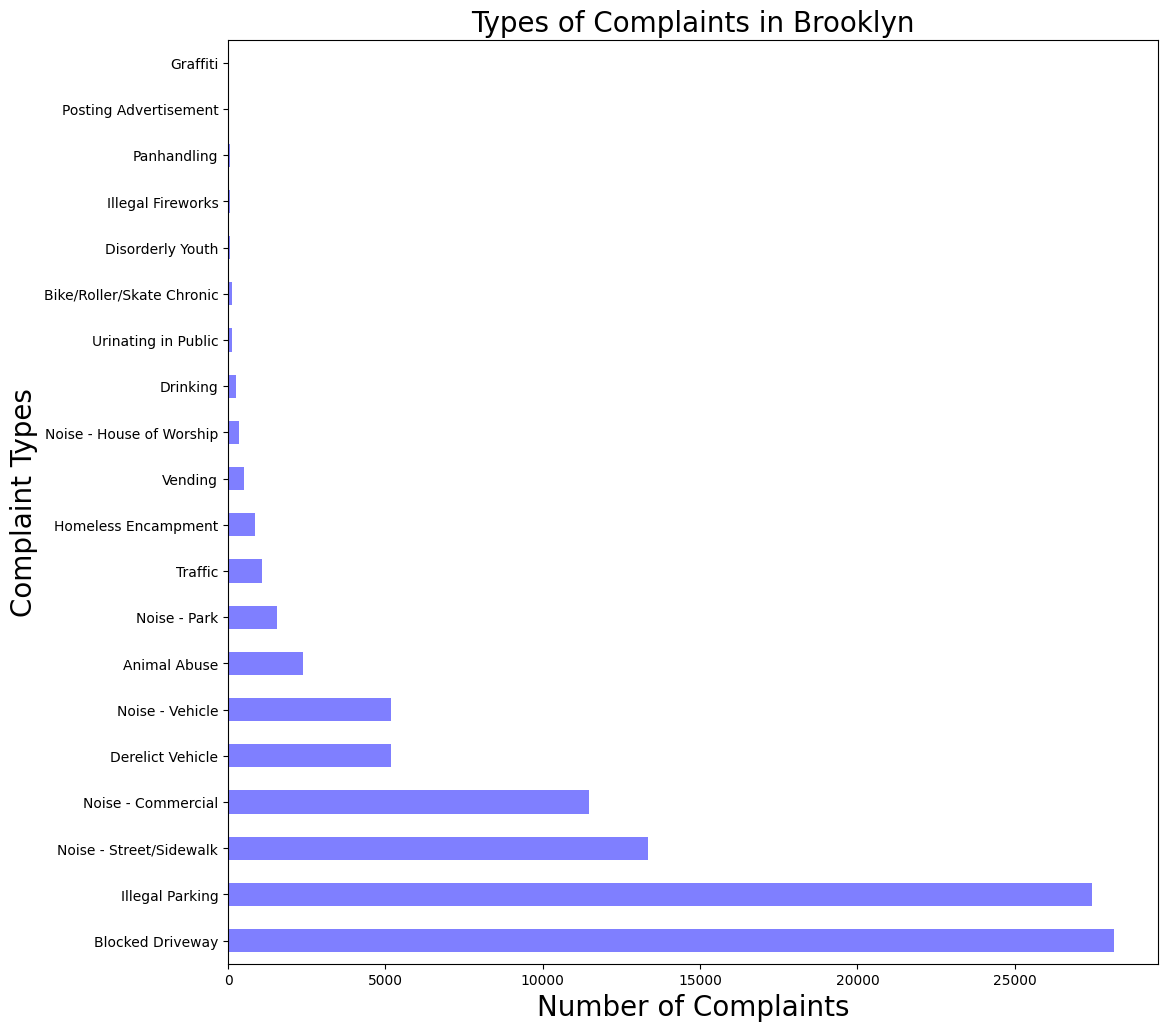

In [302]:
# Plot complaints in Brooklyn

fig,ax = plt.subplots(figsize=(12,12))
df_brooklyn['Complaint Type'].value_counts().plot(kind='barh', alpha=.5, color='b')
plt.title('Types of Complaints in Brooklyn', fontsize=20)
plt.xlabel('Number of Complaints', fontsize=20)
plt.ylabel('Complaint Types', fontsize=20)
plt.show()

In [303]:
# Complaints in New York

df_newyork = df2[df2['City'] == 'NEW YORK']
df_newyork['Complaint Type'].value_counts()

Noise - Street/Sidewalk      20426
Noise - Commercial           14544
Illegal Parking              12125
Noise - Vehicle               5484
Homeless Encampment           2775
Vending                       2398
Blocked Driveway              2070
Traffic                       1548
Animal Abuse                  1525
Noise - Park                  1210
Derelict Vehicle               537
Drinking                       295
Urinating in Public            251
Bike/Roller/Skate Chronic      225
Noise - House of Worship       194
Panhandling                    193
Disorderly Youth                69
Posting Advertisement           41
Illegal Fireworks               36
Graffiti                        22
Squeegee                         4
Name: Complaint Type, dtype: int64

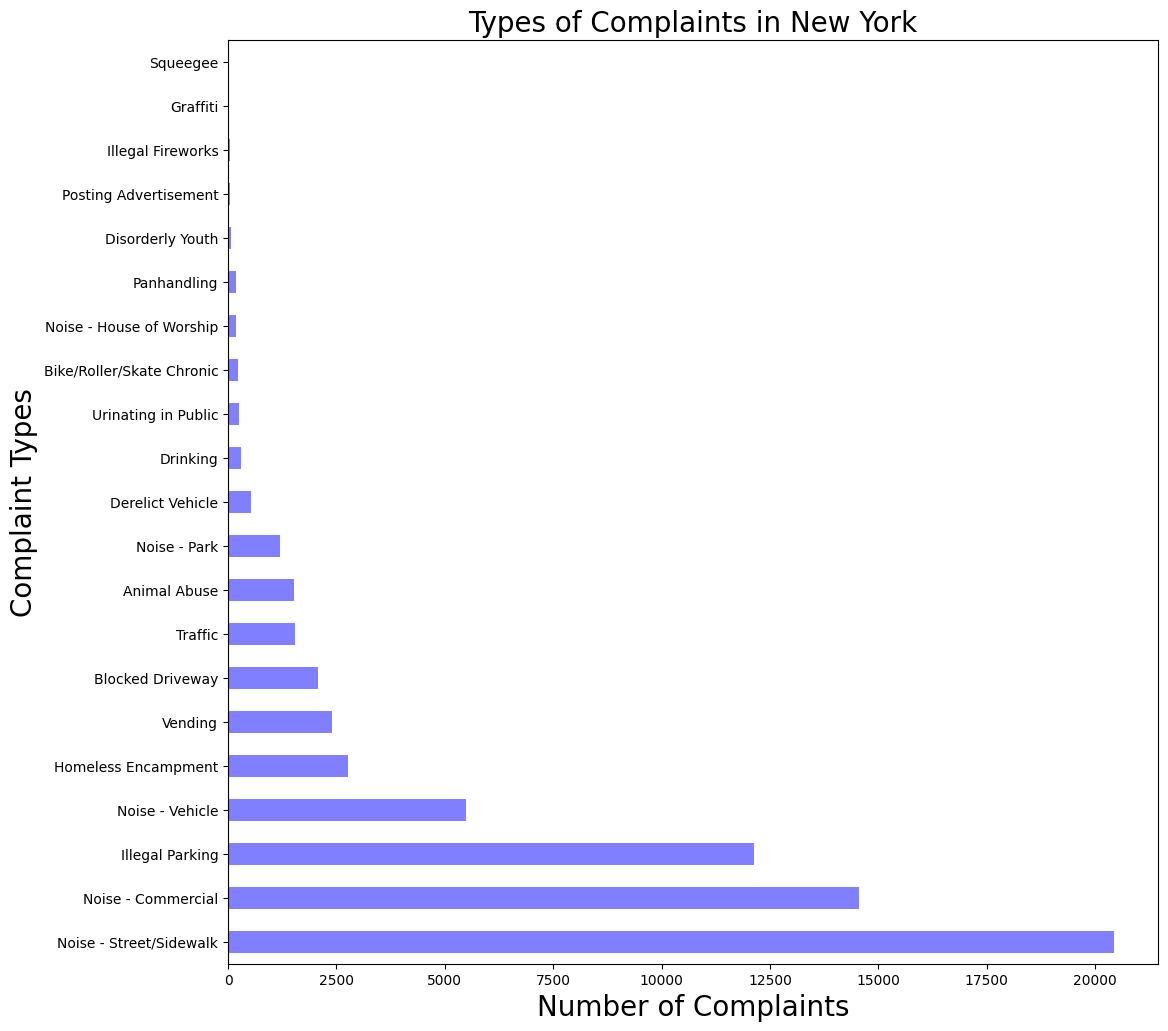

In [360]:
# Plot complaints in New York

fig,ax = plt.subplots(figsize=(12,12))
df_newyork['Complaint Type'].value_counts().plot(kind='barh', alpha=.5, color='b')
plt.title('Types of Complaints in New York', fontsize=20)
plt.xlabel('Number of Complaints', fontsize=20)
plt.ylabel('Complaint Types', fontsize=20)
plt.show()

In [305]:
# Complaints in the Bronx

df_bronx = df2[df2['City'] == 'BRONX']
df_bronx['Complaint Type'].value_counts()

Blocked Driveway             12754
Noise - Street/Sidewalk       8890
Illegal Parking               7859
Noise - Vehicle               3396
Noise - Commercial            2433
Derelict Vehicle              1952
Animal Abuse                  1415
Noise - Park                   547
Vending                        379
Traffic                        355
Homeless Encampment            247
Drinking                       188
Noise - House of Worship        79
Disorderly Youth                63
Urinating in Public             51
Illegal Fireworks               24
Bike/Roller/Skate Chronic       20
Panhandling                     19
Posting Advertisement           17
Graffiti                         9
Name: Complaint Type, dtype: int64

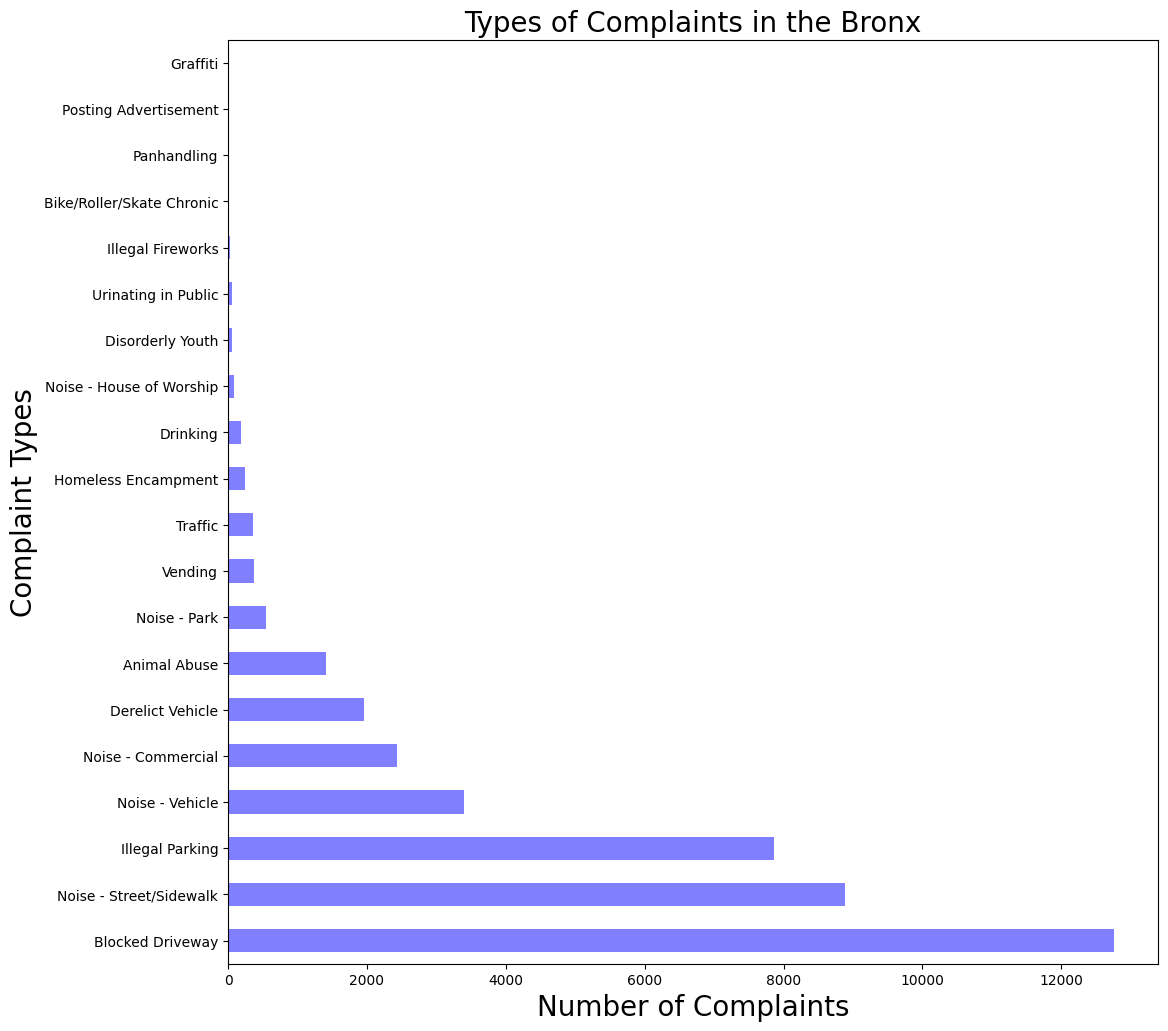

In [306]:
# Plot complaints in the Bronx

fig,ax = plt.subplots(figsize=(12,12))
df_bronx['Complaint Type'].value_counts().plot(kind='barh', alpha=.5, color='b')
plt.title('Types of Complaints in the Bronx', fontsize=20)
plt.xlabel('Number of Complaints', fontsize=20)
plt.ylabel('Complaint Types', fontsize=20)
plt.show()

In [313]:
# Check the average response time across various types of complaints

# Calculate response time

df2['Response Time'] = df2['Closed Date'] - df2['Created Date']
df2['Response Time']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
               ...      
300692   0 days 00:38:29
300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Response Time, Length: 298534, dtype: timedelta64[ns]

In [447]:
# Add column with response time in hours

df2['Response Time Hours'] = df2['Response Time'] / np.timedelta64(1, 'h')
df2['Response Time Hours'].info()

<class 'pandas.core.series.Series'>
Int64Index: 298534 entries, 0 to 300697
Series name: Response Time Hours
Non-Null Count   Dtype  
--------------   -----  
298534 non-null  float64
dtypes: float64(1)
memory usage: 4.6 MB


In [328]:
df2['Complaint Type'].value_counts()

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [378]:
# Average reponse time for Blocked Driveway

blocked_driveway = df2[df2['Complaint Type'] == 'Blocked Driveway']
print(blocked_driveway['Response Time Hours'].mean())

4.740905177277264


In [379]:
# Average response time for Illegal Parking

illegal_parking = df2[df2['Complaint Type'] == 'Illegal Parking']
print(illegal_parking['Response Time Hours'].mean())

4.501151515083753


In [380]:
# Average response time for Noise - Street/Sidewalk

noise_street = df2[df2['Complaint Type'] == 'Noise - Street/Sidewalk']
print(noise_street['Response Time Hours'].mean())

3.4452240780800762


In [386]:
# Average response time for Noise - Commercial

noise_commercial = df2[df2['Complaint Type'] == 'Noise - Commercial']
print(noise_commercial['Response Time Hours'].mean())

3.147154438675632


In [387]:
# Average response time for Derelict Vehicle

derelict = df2[df2['Complaint Type'] == 'Derelict Vehicle']
print(derelict['Response Time Hours'].mean())

7.364139643822809


In [388]:
# Average response time for Noise - Vehicle

noise_vehicle = df2[df2['Complaint Type'] == 'Noise - Vehicle']
print(noise_vehicle['Response Time Hours'].mean())

3.5889934082206434


In [393]:
# Average response time for Animal Abuse

animal_abuse = df2[df2['Complaint Type'] == 'Animal Abuse']
print(animal_abuse['Response Time Hours'].mean())

5.213243827955144


In [395]:
# Average response time for Traffic

traffic = df2[df2['Complaint Type'] == 'Traffic']
print(traffic['Response Time Hours'].mean())

3.4486811116053775


In [401]:
# Average response time for Homeless Encampment

homeless = df2[df2['Complaint Type'] == 'Homeless Encampment']
print(homeless['Response Time Hours'].mean())

4.365570148953301


In [402]:
# Average response time for Noise - Park

noise_park = df2[df2['Complaint Type'] == 'Noise - Park']
print(noise_park['Response Time Hours'].mean())

3.410732499033096


In [403]:
# Average response time for Vending

vending = df2[df2['Complaint Type'] == 'Vending']
print(vending['Response Time Hours'].mean())

4.013918679549114


In [404]:
# Average response time for Drinking

drinking = df2[df2['Complaint Type'] == 'Drinking']
print(drinking['Response Time Hours'].mean())

3.861832897603486


In [405]:
# Average response time for Noise - House of Worship

noise_house = df2[df2['Complaint Type'] == 'Noise - House of Worship']
print(noise_house['Response Time Hours'].mean())

3.1932983494797273


In [416]:
# Average response time for Posting Advertisement

posting = df2[df2['Complaint Type'] == 'Posting Advertisement']
print(posting['Response Time Hours'].mean())

1.9758033264746226


In [417]:
# Average response time for Urinating in Public

urinating = df2[df2['Complaint Type'] == 'Urinating in Public']
print(urinating['Response Time Hours'].mean())

3.6266643205705704


In [418]:
# Average response time for Bike/Roller/Skate Chronic

bike = df2[df2['Complaint Type'] == 'Bike/Roller/Skate Chronic']
print(bike['Response Time Hours'].mean())

3.7664622641509435


In [419]:
# Average response time for Panhandling

panhandling = df2[df2['Complaint Type'] == 'Panhandling']
print(panhandling['Response Time Hours'].mean())

4.372767759562842


In [421]:
# Average response time for Disorderly Youth

disorderly = df2[df2['Complaint Type'] == 'Disorderly Youth']
print(disorderly['Response Time Hours'].mean())

3.5585839160839163


In [428]:
# Average response time for Illegal Fireworks

fireworks = df2[df2['Complaint Type'] == 'Illegal Fireworks']
print(fireworks['Response Time Hours'].mean())

2.7611392195767195


In [422]:
# Average response time for Graffiti

graffiti = df2[df2['Complaint Type'] == 'Graffiti']
print(graffiti['Response Time Hours'].mean())

7.151251229105212


In [423]:
# Average response time for Agency Issues

agency = df2[df2['Complaint Type'] == 'Agency Issues']
print(agency['Response Time Hours'].mean())

5.260324074074074


In [424]:
# Average response time for Squeegee

squeegee = df2[df2['Complaint Type'] == 'Squeegee']
print(squeegee['Response Time Hours'].mean())

4.045625


In [425]:
# Average response time for Animal in a Park

animal_park = df2[df2['Complaint Type'] == 'Animal in a Park']
print(animal_park['Response Time Hours'].mean())

336.83472222222224


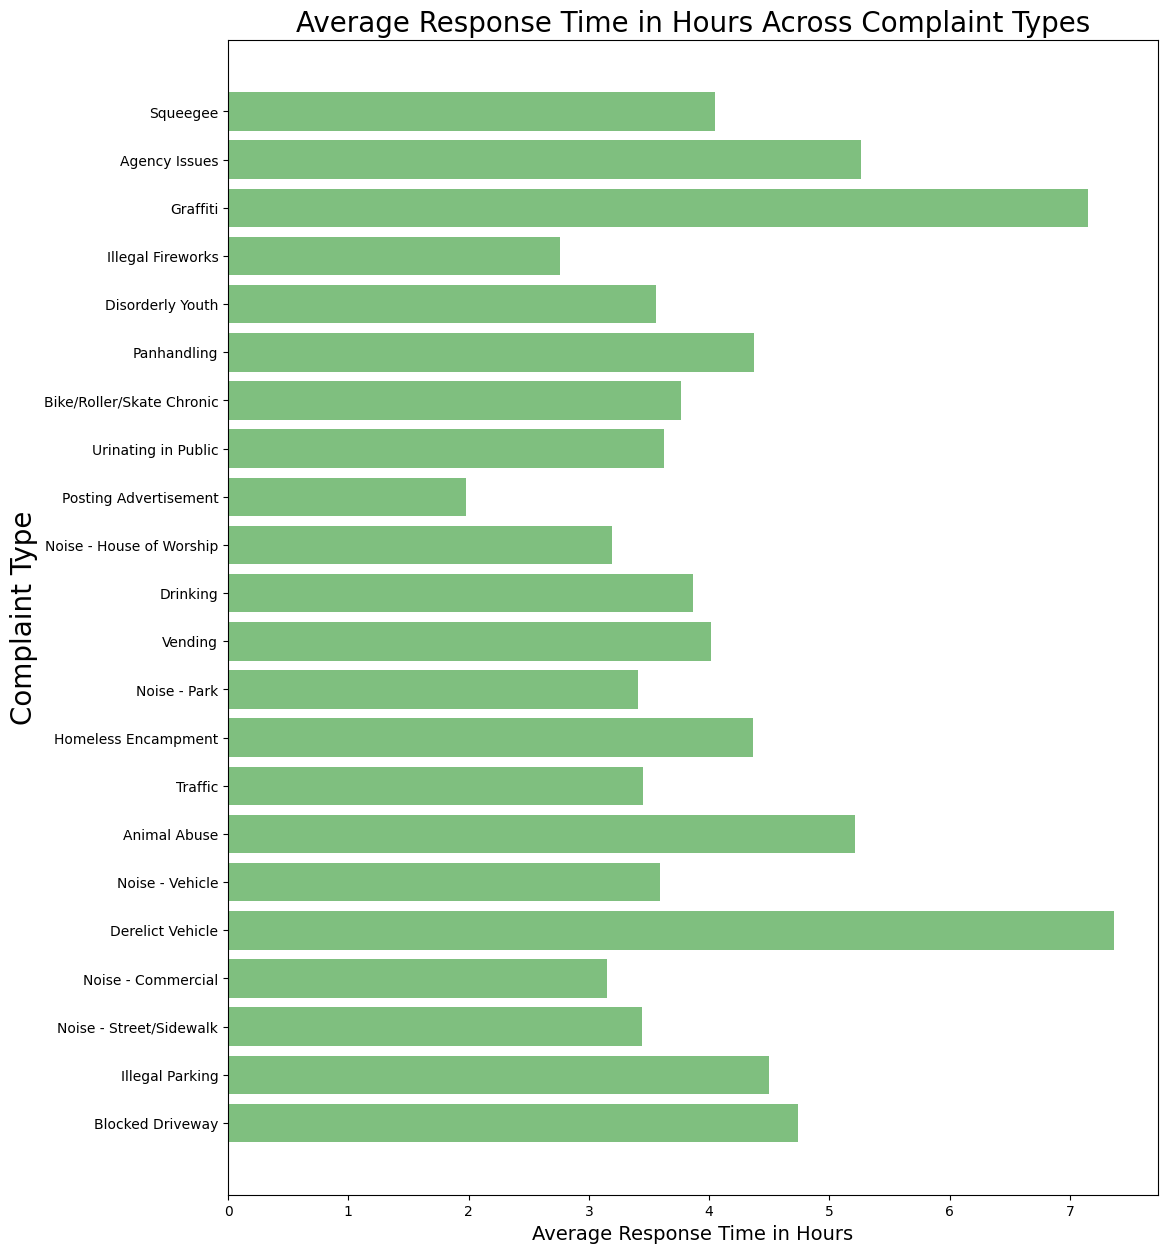

In [446]:
# Plot average response time across various types of complaints

fig,ax = plt.subplots(figsize = (12,15))

x= ['Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial','Derelict Vehicle','Noise - Vehicle','Animal Abuse','Traffic','Homeless Encampment','Noise - Park','Vending','Drinking','Noise - House of Worship','Posting Advertisement','Urinating in Public','Bike/Roller/Skate Chronic','Panhandling','Disorderly Youth','Illegal Fireworks','Graffiti','Agency Issues','Squeegee']
y= [4.740905177277264,4.501151515083753,3.4452240780800762,3.147154438675632,7.364139643822809,3.5889934082206434,5.213243827955144,3.4486811116053775,4.365570148953301,3.410732499033096,4.013918679549114,3.861832897603486,3.1932983494797273,1.9758033264746226,3.6266643205705704,3.7664622641509435,4.372767759562842,3.5585839160839163,2.7611392195767195,7.151251229105212,5.260324074074074,4.045625]
plt.barh(x, y, alpha=.5, color= 'g')
plt.title("Average Response Time in Hours Across Complaint Types", fontsize=20)
plt.xlabel("Average Response Time in Hours", fontsize=14)
plt.ylabel("Complaint Type", fontsize=20)
plt.show()

